# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **THE CBB6**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import datetime as dt
# Libraries for data loading, data manipulation and data visulisation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# To be changed based on the model of choice
from sklearn.linear_model import LinearRegression

# Setting global constants to ensure notebook results are reproducible
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Import libraries
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load dataset

df_train = pd.read_csv('https://raw.githubusercontent.com/CBB6/spain-electricity-shortfall-challenge-2022-data/main/df_train.csv', index_col=0)
df_test = pd.read_csv('https://raw.githubusercontent.com/CBB6/spain-electricity-shortfall-challenge-2022-data/main/df_test.csv', index_col=0)
df_sample_submission_load_shortfall = pd.read_csv('https://raw.githubusercontent.com/CBB6/spain-electricity-shortfall-challenge-2022-data/main/sample_submission_load_shortfall.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df_train.head(1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.66667,level_5,0.00000,0.66667,74.33333,64.00000,0.00000,1.00000,0.00000,...,265.93800,281.01300,269.33861,269.33861,281.01300,269.33861,274.25467,265.93800,265.93800,6715.66667


In [4]:
# look at data statistics
df_test.head(1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.00000,level_8,0.00000,5.00000,87.00000,71.33333,20.00000,3.00000,0.00000,...,287.81667,280.81667,287.35667,276.15000,280.38000,286.81667,285.15000,283.15000,279.86667,279.15000


In [5]:
# look at data statistics
df_sample_submission_load_shortfall.head(1)

,load_shortfall_3h
time,
2018-01-01 00:00:00,0


In [6]:
# look at data statistics

df_train_shape = df_train.shape
df_test_shape = df_test.shape
df_sample_submission_load_shortfall_shape = df_sample_submission_load_shortfall.shape

print('Train_Columns: ' + str(df_train_shape[1]) + '\nTrain_Rows: ' + str(df_train_shape[0]))
print('\n\nTest_Columns: ' + str(df_test_shape[1]) + '\nTest_Rows: ' + str(df_test_shape[0]))
print('\n\nSample_submission_load_shortfall_shape_Columns: ' + str(df_sample_submission_load_shortfall_shape[1]) + '\nSample_submission_load_shortfall_shape_Rows: ' + str(df_sample_submission_load_shortfall_shape[0]))

Train_Columns: 48
Train_Rows: 8763


Test_Columns: 47
Test_Rows: 2920


Sample_submission_load_shortfall_shape_Columns: 1
Sample_submission_load_shortfall_shape_Rows: 2920


In [7]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [8]:
# look at data statistics
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,...,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000
mean,2.42573,0.13575,2.58627,62.65879,57.41472,43.46913,1.85036,13.71475,158.95751,2.87050,...,289.54031,289.85546,285.01797,286.42293,288.44742,287.96603,291.63336,288.41944,287.20220,10673.85761
std,1.85037,0.37490,2.41119,22.62123,24.33540,32.55104,1.69589,24.27248,102.05630,1.79220,...,9.75205,6.52811,6.70567,6.81868,6.10259,7.10559,8.17822,9.34680,9.20624,5218.04640
min,0.00000,0.00000,0.00000,8.33333,6.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,264.98333,270.81667,264.48333,267.48333,269.48333,269.06300,270.15000,264.98333,264.98333,-6618.00000
25%,1.00000,0.00000,1.00000,44.33333,36.33333,10.00000,0.66667,0.00000,73.33333,1.66667,...,282.15000,284.97344,280.08517,281.37417,284.15000,282.83678,285.81667,281.40428,280.29917,7390.33333
50%,2.00000,0.00000,1.66667,65.66667,58.00000,45.00000,1.00000,0.00000,147.00000,2.66667,...,288.11618,289.41667,284.81667,286.15833,288.15000,287.63000,290.81667,287.05333,286.08333,11114.66667
75%,3.33333,0.10000,3.66667,82.00000,78.66667,75.00000,2.66667,20.00000,234.00000,4.00000,...,296.81667,294.90900,289.81667,291.03417,292.96667,292.48333,297.15000,295.15467,293.88450,14498.16667
max,13.00000,3.00000,52.00000,100.00000,100.00000,100.00000,12.66667,97.33333,359.33333,12.66667,...,314.48333,307.31667,309.81667,310.71000,304.81667,317.96667,314.81667,313.13333,310.38333,31904.00000


<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

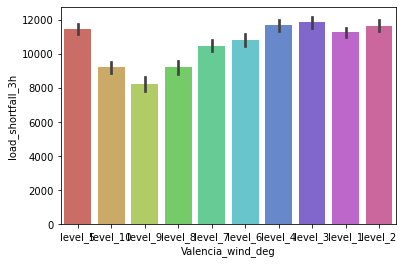

In [9]:
# plot relevant feature interactions
sns.barplot(x = 'Valencia_wind_deg', y="load_shortfall_3h", data=df_train, palette="hls")

In [10]:
# evaluate correlation
df_train.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.00000,0.25972,0.51309,-0.11789,-0.13709,0.24400,0.37785,0.19125,0.27095,0.29464,...,0.09146,0.08013,0.07733,0.06047,0.08999,0.04211,0.11028,0.10957,0.09814,-0.15098
Bilbao_rain_1h,0.25972,1.00000,0.26586,0.06988,0.10676,0.37073,0.08540,0.08113,0.27935,0.07000,...,-0.14840,-0.13890,-0.14127,-0.18249,-0.10659,-0.21987,-0.12057,-0.13593,-0.11643,-0.15251
Valencia_wind_speed,0.51309,0.26586,1.00000,-0.07523,-0.01939,0.21052,0.38648,0.16368,0.24864,0.34797,...,-0.02197,-0.02146,-0.01017,-0.02268,0.00141,-0.03327,0.00362,-0.01198,-0.01974,-0.14279
Seville_humidity,-0.11789,0.06988,-0.07523,1.00000,0.79983,0.06168,-0.08818,0.39944,-0.08725,-0.13862,...,-0.70894,-0.61780,-0.60549,-0.60473,-0.59507,-0.58372,-0.78485,-0.71717,-0.68866,-0.16729
Madrid_humidity,-0.13709,0.10676,-0.01939,0.79983,1.00000,0.04188,-0.01681,0.37411,-0.06957,-0.05852,...,-0.80326,-0.68487,-0.63576,-0.63482,-0.63678,-0.61140,-0.76959,-0.80261,-0.75963,-0.15054
Bilbao_clouds_all,0.24400,0.37073,0.21052,0.06168,0.04188,1.00000,0.03192,0.04674,0.28015,0.09402,...,-0.04849,-0.02317,-0.06773,-0.11412,-0.01080,-0.15801,-0.07742,-0.04669,-0.04619,-0.12729
Bilbao_wind_speed,0.37785,0.08540,0.38648,-0.08818,-0.01681,0.03192,1.00000,0.12734,0.41753,0.27532,...,0.02537,0.01897,0.10730,0.14244,0.02371,0.17712,0.05508,0.03124,0.02142,-0.08160
Seville_clouds_all,0.19125,0.08113,0.16368,0.39944,0.37411,0.04674,0.12734,1.00000,0.05348,0.13659,...,-0.23890,-0.18646,-0.13425,-0.15239,-0.15341,-0.16557,-0.20045,-0.22709,-0.21276,-0.09180
Bilbao_wind_deg,0.27095,0.27935,0.24864,-0.08725,-0.06957,0.28015,0.41753,0.05348,1.00000,0.17739,...,0.02853,0.06870,0.09505,0.06540,0.08648,0.03119,0.06266,0.04410,0.04840,-0.12080
Barcelona_wind_speed,0.29464,0.07000,0.34797,-0.13862,-0.05852,0.09402,0.27532,0.13659,0.17739,1.00000,...,0.08421,0.11624,0.12340,0.12036,0.10927,0.10969,0.13037,0.08937,0.08468,-0.10363


<AxesSubplot:xlabel='load_shortfall_3h'>

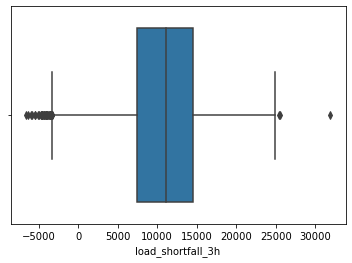

In [11]:
# have a look at feature distributions
sns.boxplot(x='load_shortfall_3h', data=df_train)

In [12]:
# check for missing values
print('Train data missing status : ' + str(df_train.isnull().sum().any()))
print('Test data missing  status : ' + str(df_test.isnull().sum().any()))
print('Sample data missing status: ' + str(df_sample_submission_load_shortfall.isnull().sum().any()))

Train data missing status : True
Test data missing  status : True
Sample data missing status: False


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [13]:
# get Inter Quartile Range
Q1 = np.percentile(df_train['load_shortfall_3h'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_train['load_shortfall_3h'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [14]:
# get lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [15]:
# load lower bound and upper bound
upper_bound = df_train['load_shortfall_3h'] >= (Q3 + 1.5 * IQR)
lower_bound = df_train['load_shortfall_3h'] <= (Q1 - 1.5 * IQR)

In [16]:
# Remove outliers
upper_points = np.where(upper_bound)
lower_points = np.where(lower_bound)
print('Rows and Columns with outliers' + str(df_train.shape))
df_train.drop(upper_points[0], inplace=True)
df_train.drop(lower_points[0], inplace=True)
print('Rows and Columns without outliers' + str(df_train.shape))

Rows and Columns with outliers(8763, 48)
Rows and Columns without outliers(8713, 48)


In [17]:
# remove missing values/ features
mode = pd.concat([df_train.Valencia_pressure, df_test.Valencia_pressure]).mode()
df_train.Valencia_pressure.fillna(mode[0] , inplace=True)
df_test.Valencia_pressure.fillna(mode[0], inplace=True)

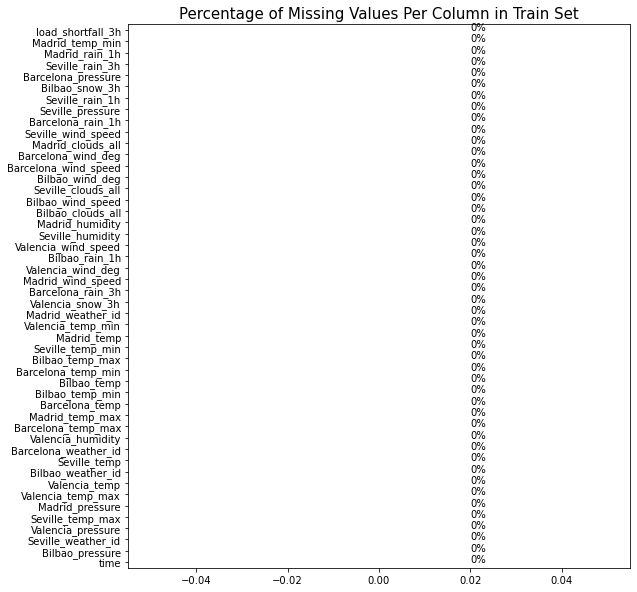

In [18]:
# plot missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [19]:
# impute Categorical features
enc = OrdinalEncoder()

df_train.Valencia_wind_deg = enc.fit_transform(df_train[['Valencia_wind_deg']])
df_train.Seville_pressure = enc.fit_transform(df_train[['Seville_pressure']])

df_test.Valencia_wind_deg = enc.fit_transform(df_test[['Valencia_wind_deg']])
df_test.Seville_pressure = enc.fit_transform(df_test[['Seville_pressure']])

In [20]:
# create new features

# get time
df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])

# get hour
df_train['Hour'] = df_train['time'].dt.hour
df_test['Hour'] = df_test['time'].dt.hour

# get day
df_train['Day'] = df_train['time'].dt.day
df_test['Day'] = df_test['time'].dt.day

# get month
df_train['Month'] = df_train['time'].dt.month
df_test['Month'] = df_test['time'].dt.month

# get year
df_train['Year'] = df_train['time'].dt.year
df_test['Year'] = df_test['time'].dt.year

# drop feature
df_train.drop(['time'] , axis=1 , inplace=True)
df_test.drop(['time'] , axis=1 , inplace=True)

columns = df_train.drop(['load_shortfall_3h'] , axis=1).columns

In [21]:
df_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Hour,Day,Month,Year
8763,5.00000,8.00000,0.00000,5.00000,87.00000,71.33333,20.00000,3.00000,0.00000,193.33333,...,280.38000,286.81667,285.15000,283.15000,279.86667,279.15000,0,1,1,2018
8764,4.66667,8.00000,0.00000,5.33333,89.00000,78.00000,0.00000,3.66667,0.00000,143.33333,...,281.01000,283.48333,284.15000,281.15000,279.19333,278.15000,3,1,1,2018
8765,2.33333,7.00000,0.00000,5.00000,89.00000,89.66667,0.00000,2.33333,6.66667,130.00000,...,279.19667,281.81667,282.15000,280.48333,276.34000,276.15000,6,1,1,2018
8766,2.66667,7.00000,0.00000,5.33333,93.33333,82.66667,26.66667,5.66667,6.66667,196.66667,...,281.74000,282.15000,284.48333,279.15000,275.95333,274.48333,9,1,1,2018
8767,4.00000,7.00000,0.00000,8.66667,65.33333,64.00000,26.66667,10.66667,0.00000,233.33333,...,284.11667,286.15000,286.81667,284.48333,280.68667,280.15000,12,1,1,2018


In [22]:
# engineer existing features

# scale the dataset
scaler = StandardScaler()
scaled_features = scaler.fit(df_train)
scaled_features_test = scaler.fit_transform(df_test.values)

df_train_scaled = pd.DataFrame(scaled_features, index = df_train.index, columns = columns)
df_test_scaled = pd.DataFrame(scaled_features_test, index = df_test.index , columns = columns)

# add load_short_fall_3h columns to df_train
df_train_scaled['load_shortfall_3h'] = df_train.copy().load_shortfall_3h.values

<AxesSubplot:xlabel='load_shortfall_3h'>

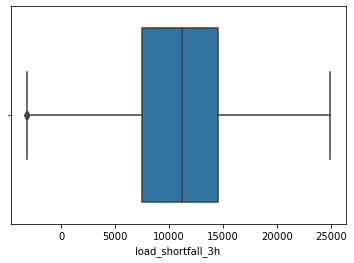

In [23]:
# check data distribution and outliers
sns.boxplot(x='load_shortfall_3h', data=df_train)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [24]:
# split data

In [25]:
# create targets and features dataset

In [26]:
# create one or more ML models

In [27]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [28]:
# Compare model performance

In [29]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [30]:
# discuss chosen methods logic